In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 8
from vega_datasets import data

In [2]:
data.list_datasets()

['7zip',
 'airports',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate',
 'co2-concentration',
 'countries',
 'crimea',
 'disasters',
 'driving',
 'earthquakes',
 'ffox',
 'flare',
 'flare-dependencies',
 'flights-10k',
 'flights-200k',
 'flights-20k',
 'flights-2k',
 'flights-3m',
 'flights-5k',
 'flights-airport',
 'gapminder',
 'gapminder-health-income',
 'gimp',
 'github',
 'graticule',
 'income',
 'iowa-electricity',
 'iris',
 'jobs',
 'la-riots',
 'londonBoroughs',
 'londonCentroids',
 'londonTubeLines',
 'lookup_groups',
 'lookup_people',
 'miserables',
 'monarchs',
 'movies',
 'normal-2d',
 'obesity',
 'points',
 'population',
 'population_engineers_hurricanes',
 'seattle-temps',
 'seattle-weather',
 'sf-temps',
 'sp500',
 'stocks',
 'udistrict',
 'unemployment',
 'unemployment-across-industries',
 'us-10m',
 'us-employment',
 'us-state-capitals',
 'weather',
 'weball26',
 'wheat',
 'world-110m',
 'zipcodes']

In [3]:
df = data.sf_temps()

In [4]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [6]:
df = df.set_index('date').sort_index()

In [7]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [8]:
daily_mean_df = df.resample('D').mean()

In [9]:
daily_mean_df

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


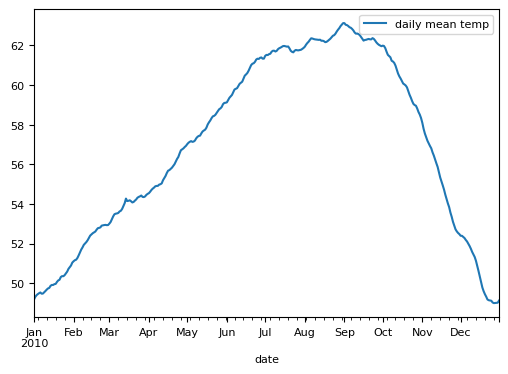

In [10]:
daily_mean_df.temp.plot(label='daily mean temp')
plt.legend()
plt.show()

In [11]:
daily_min_df = df.resample('D').min()

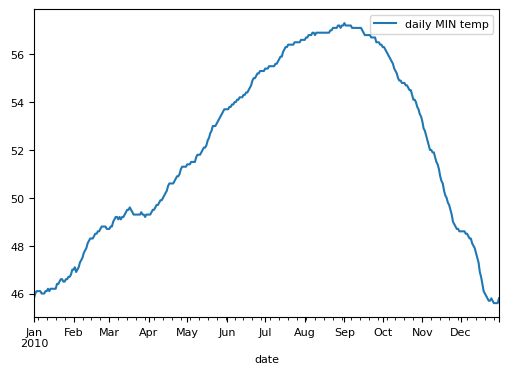

In [12]:
daily_min_df.temp.plot(label='daily MIN temp')
plt.legend()
plt.show()

In [13]:
daily_max_df = df.resample('D').max()

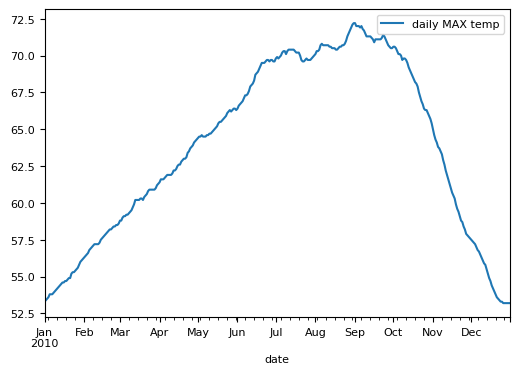

In [14]:
daily_max_df.temp.plot(label='daily MAX temp')
plt.legend()
plt.show()

In [15]:
monthly_mean_df = df.resample('M').mean()

In [16]:
monthly_mean_df.sort_values(['temp']) # January 2010 was coldest month

,temp
date,
2010-01-31,49.984140
2010-12-31,50.498253
2010-02-28,52.243899
2010-03-31,53.956528
2010-11-30,55.185139
2010-04-30,55.633056
2010-05-31,57.970968
2010-10-31,60.253091
2010-06-30,60.444722


In [17]:
monthly_mean_df.sort_values(['temp'],ascending=False) # Sept has highest avg temp

,temp
date,
2010-09-30,62.487083
2010-08-31,62.405376
2010-07-31,61.765457
2010-06-30,60.444722
2010-10-31,60.253091
2010-05-31,57.970968
2010-04-30,55.633056
2010-11-30,55.185139
2010-03-31,53.956528


In [18]:
daily_diff_df = df.resample('D').agg(['min','max'])

In [19]:
daily_diff_df.temp.max

<bound method NDFrame._add_numeric_operations.<locals>.max of              min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]>

In [20]:
daily_diff_df.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [21]:
daily_diff_df['max_temp'] = daily_diff_df.temp['max']
daily_diff_df['min_temp'] = daily_diff_df.temp['min']

In [22]:
daily_diff_df['diff'] = daily_diff_df.max_temp - daily_diff_df.min_temp

In [23]:
daily_diff_df.head()

temp       max_temp min_temp diff
             min   max                       
date                                         
2010-01-01  45.8  53.3     53.3     45.8  7.5
2010-01-02  46.0  53.4     53.4     46.0  7.4
2010-01-03  46.1  53.5     53.5     46.1  7.4
2010-01-04  46.1  53.6     53.6     46.1  7.5
2010-01-05  46.1  53.8     53.8     46.1  7.7

In [24]:
daily_diff_by_month = daily_diff_df.resample('M').mean()

In [25]:
daily_diff_by_month.drop(columns='temp',inplace=True)

In [26]:
daily_diff_by_month.sort_values(['diff'],ascending=False) # Sept greatest daily temp variability

,max_temp,min_temp,diff
,,,
date,,,
2010-09-30,71.306667,56.903333,14.403333
2010-07-31,70.022581,56.045161,13.977419
2010-06-30,68.430000,54.480000,13.950000
2010-08-31,70.812903,56.941935,13.870968
2010-10-31,68.364516,54.932258,13.432258
2010-05-31,65.312903,52.403226,12.909677
2010-04-30,62.646667,50.326667,12.320000
2010-03-31,60.093548,49.238710,10.854839


# Seattle

In [27]:
df = data.seattle_weather()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [29]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [30]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [31]:
df.date.max()

Timestamp('2015-12-31 00:00:00')

In [32]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [33]:
# Reset index to date
df = df.set_index('date').sort_index()

In [34]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [35]:
df_num = df.drop(columns='weather')

In [36]:
df_num.head()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-01,0.0,12.8,5.0,4.7
2012-01-02,10.9,10.6,2.8,4.5
2012-01-03,0.8,11.7,7.2,2.3
2012-01-04,20.3,12.2,5.6,4.7
2012-01-05,1.3,8.9,2.8,6.1


In [37]:
monthly_sum_df = df_num.resample('M').sum()

In [38]:
monthly_sum_df['precipitation'].sort_values(ascending=False).head() # DEC 2015 greatest sum precipitation

date
2015-12-31    284.5
2014-03-31    240.0
2015-11-30    212.6
2012-11-30    210.5
2012-03-31    183.0
Name: precipitation, dtype: float64

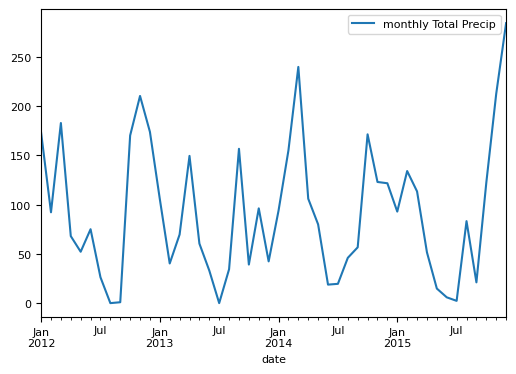

In [39]:
monthly_sum_df['precipitation'].plot(label='monthly Total Precip')
plt.legend()
plt.show()

In [40]:
daily_sum_df = df_num.resample('D').mean()

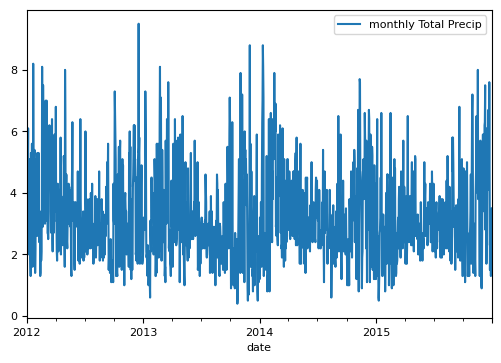

In [41]:
daily_sum_df['wind'].plot(label='monthly Total Precip')
plt.legend()
plt.show()

In [42]:
monthly_mean_df = df_num.resample('M').mean()

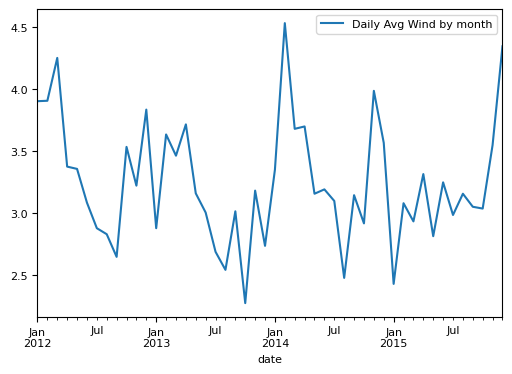

In [43]:
monthly_mean_df['wind'].plot(label='Daily Avg Wind by month')
plt.legend()
plt.show()

In [44]:
monthly_mean_df['wind'].sort_values(ascending=False).head() # Feb 2014 greatest Daily Avg Wind

date
2014-02-28    4.528571
2015-12-31    4.341935
2012-03-31    4.248387
2014-11-30    3.983333
2012-02-29    3.903448
Name: wind, dtype: float64

# Sunniest Year?

In [45]:
df_num_cols = df_num.columns
df_cat = df.drop(columns=df_num_cols)

In [46]:
df_cat

,weather
date,
2012-01-01,drizzle
2012-01-02,rain
2012-01-03,rain
2012-01-04,rain
2012-01-05,rain
...,...
2015-12-27,fog
2015-12-28,fog
2015-12-29,fog


In [47]:
df_cat = pd.get_dummies(df_cat)

In [48]:
df_cat

,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
date,,,,,
2012-01-01,1,0,0,0,0
2012-01-02,0,0,1,0,0
2012-01-03,0,0,1,0,0
2012-01-04,0,0,1,0,0
2012-01-05,0,0,1,0,0
...,...,...,...,...,...
2015-12-27,0,1,0,0,0
2015-12-28,0,1,0,0,0
2015-12-29,0,1,0,0,0


In [49]:
bye_cols = ['weather_fog','weather_rain', 'weather_snow', 'weather_drizzle']
df_sun = df_cat.drop(columns=bye_cols)

In [50]:
df_sun

,weather_sun
date,
2012-01-01,0
2012-01-02,0
2012-01-03,0
2012-01-04,0
2012-01-05,0
...,...
2015-12-27,0
2015-12-28,0
2015-12-29,0


In [51]:
df_sun.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   weather_sun  1461 non-null   uint8
dtypes: uint8(1)
memory usage: 12.8 KB


In [52]:
yearly_sum_df = df_sun.resample('Y').sum()

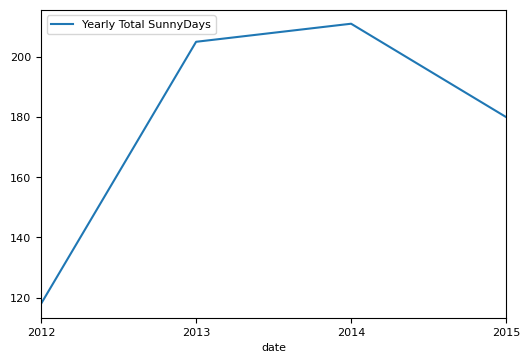

In [53]:
yearly_sum_df['weather_sun'].plot(label='Yearly Total SunnyDays')
plt.legend()
plt.show()

In [54]:
yearly_sum_df['weather_sun'].sort_values(ascending=False) # 2014 Sunniest Year 

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: weather_sun, dtype: uint8

# Rainiest Month

In [55]:
bye_cols = ['weather_fog','weather_sun', 'weather_snow', 'weather_drizzle']
df_rain = df_cat.drop(columns=bye_cols)

In [56]:
df_rain

,weather_rain
date,
2012-01-01,0
2012-01-02,1
2012-01-03,1
2012-01-04,1
2012-01-05,1
...,...
2015-12-27,0
2015-12-28,0
2015-12-29,0


In [57]:
monthly_sum_df = df_rain.resample('M').sum()

In [58]:
monthly_sum_df['weather_rain'].sort_values(ascending=False).head() # NOV 2012 Rainiest Month 

date
2012-11-30    25
2012-12-31    23
2013-02-28    23
2012-03-31    19
2012-04-30    19
Name: weather_rain, dtype: uint8

# month with most days of precip

In [59]:
monthly_sum_df = df_sun.resample('M').sum()

In [60]:
monthly_sum_df['weather_sun'].sort_values(ascending=True).head() # Dec 2012 Wettest Month

date
2012-12-31    1
2013-02-28    2
2012-11-30    2
2015-01-31    3
2012-01-31    4
Name: weather_sun, dtype: uint8

# FLIGHt DATA

In [61]:
df = data.flights_20k()

In [62]:
df = df.set_index('date').sort_index()

In [63]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-01 00:01:00 to 2001-03-31 21:30:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB


In [65]:
df.describe()

,delay,distance
count,20000.000000,20000.000000
mean,8.103600,505.262400
std,25.375748,356.950889
min,-58.000000,108.000000
25%,-5.000000,284.000000
50%,0.000000,370.000000
75%,12.000000,611.000000
max,509.000000,2298.000000


In [66]:
cat_cols = ['origin', 'destination']
df_num = df.drop(columns=cat_cols)

In [67]:
df_num

,delay,distance
date,,
2001-01-01 00:01:00,14,405
2001-01-01 06:20:00,0,491
2001-01-01 06:30:00,-8,251
2001-01-01 07:00:00,-10,361
2001-01-01 07:00:00,0,303
...,...,...
2001-03-31 21:02:00,26,303
2001-03-31 21:05:00,-5,318
2001-03-31 21:05:00,-1,451


In [68]:
df_num.delay[df_num['delay'] < 0] = 0

In [69]:
df_num

,delay,distance
date,,
2001-01-01 00:01:00,14,405
2001-01-01 06:20:00,0,491
2001-01-01 06:30:00,0,251
2001-01-01 07:00:00,0,361
2001-01-01 07:00:00,0,303
...,...,...
2001-03-31 21:02:00,26,303
2001-03-31 21:05:00,0,318
2001-03-31 21:05:00,0,451


In [70]:
df_num['hour'] = df_num.index.hour
df_num

,delay,distance,hour
date,,,
2001-01-01 00:01:00,14,405,0
2001-01-01 06:20:00,0,491,6
2001-01-01 06:30:00,0,251,6
2001-01-01 07:00:00,0,361,7
2001-01-01 07:00:00,0,303,7
...,...,...,...
2001-03-31 21:02:00,26,303,21
2001-03-31 21:05:00,0,318,21
2001-03-31 21:05:00,0,451,21


In [71]:
df_num.groupby('hour').mean().sort_values(['delay'],ascending=False) # hour 3 has highest mean delay

,delay,distance
hour,,
3,302.500000,322.000000
1,170.000000,256.000000
0,127.916667,424.583333
23,65.353846,369.107692
22,32.704607,374.978320
21,21.626768,397.796518
20,17.889778,450.998222
19,16.256557,501.912295
18,14.514218,516.674566


In [72]:
df_num['d_o_w'] = df_num.index.day_of_week
df_num

,delay,distance,hour,d_o_w
date,,,,
2001-01-01 00:01:00,14,405,0,0
2001-01-01 06:20:00,0,491,6,0
2001-01-01 06:30:00,0,251,6,0
2001-01-01 07:00:00,0,361,7,0
2001-01-01 07:00:00,0,303,7,0
...,...,...,...,...
2001-03-31 21:02:00,26,303,21,5
2001-03-31 21:05:00,0,318,21,5
2001-03-31 21:05:00,0,451,21,5


In [73]:
df_num.groupby('d_o_w').mean().sort_values(['delay'],ascending=False) # Yes, D O W matters

,delay,distance,hour
d_o_w,,,
4,17.757596,501.118230,13.667107
3,12.821322,485.175025,13.619728
2,11.032478,501.009094,13.588828
6,10.413542,507.987758,14.236419
1,9.410866,496.021732,13.397963
5,8.431498,550.889031,13.010670
0,7.165772,505.032215,13.454362


In [74]:
df_num['month'] = df_num.index.month
df_num

,delay,distance,hour,d_o_w,month
date,,,,,
2001-01-01 00:01:00,14,405,0,0,1
2001-01-01 06:20:00,0,491,6,0,1
2001-01-01 06:30:00,0,251,6,0,1
2001-01-01 07:00:00,0,361,7,0,1
2001-01-01 07:00:00,0,303,7,0,1
...,...,...,...,...,...
2001-03-31 21:02:00,26,303,21,5,3
2001-03-31 21:05:00,0,318,21,5,3
2001-03-31 21:05:00,0,451,21,5,3


In [75]:
df_num.groupby('month').mean().sort_values(['delay'],ascending=False) # Yes, month matters

,delay,distance,hour,d_o_w
month,,,,
2,12.306106,511.156170,13.644182,2.913203
1,11.301592,500.391952,13.552771,2.758255
3,9.875287,504.712069,13.531897,2.975575
